In [1]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import matplotlib.pyplot as plt
import os
from paths import *
from itertools import chain

/hhome/ps2g07/miniconda3/envs/DocTR/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import torch
from torch.nn import functional as F

In [10]:
anchor = torch.randn(78, 500)
embeddings = torch.randn(3, 500)
out = F.cosine_similarity(anchor.unsqueeze(0), embeddings.unsqueeze(1), dim=2)

In [16]:
a = torch.load('/hhome/ps2g07/document_analysis/github/Project_Synthesis2-/Nil/simclr_anchorEmbeddings.pth')

In [21]:
import numpy as np
from PIL import Image
import torch
from torch.nn import functional as F

In [18]:
a = torch.randn(torch.Size([79, 512]))
b = torch.randn(torch.Size([41, 512]))

In [23]:
F.cosine_similarity(a, b[:, None, :], dim=2).shape

torch.Size([41, 79])

In [24]:
path = '/hhome/ps2g07/document_analysis/github/Project_Synthesis2-/Nil/simclr_anchorEmbeddings.pth'
l = torch.load(path)

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 79 samples in 0.000s...
[t-SNE] Computed neighbors for 79 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 79 / 79
[t-SNE] Mean sigma: 6.690413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.649895
[t-SNE] KL divergence after 1000 iterations: 0.431781


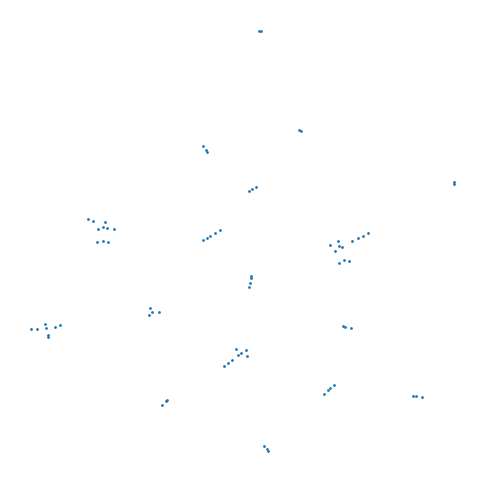

In [26]:
# Plot the embeddings with TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load the embeddings
embeddings = l.cpu().numpy()

# Reduce the dimensionality of the embeddings
tsne = TSNE(n_components=2, perplexity=1, verbose=1)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(6, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=1)
plt.axis('off')
plt.show()

In [2]:
pdfs = []

pdfs_path = '/hhome/ps2g07/document_analysis/github/Project_Synthesis2-/Sample documents'
for dirpath, dirnames, filenames in os.walk(pdfs_path):
    for filename in filenames:
        if filename.endswith(".pdf"):
            # Construct the full path
            full_path = Path(dirpath) / filename
            # Append it to the list
            pdfs.append(full_path)

In [3]:
documents = [DocumentFile.from_pdf(pdf) for pdf in pdfs]
model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

In [14]:
DocumentFile.from_pdf(pdfs[0])[0].shape

(1479, 1229, 3)

In [5]:
from PIL import Image
from PIL import ImageDraw

def draw_page(page):
    img_shape = page.dimensions
    new_img = Image.new('RGB', page.dimensions, color = (255, 255, 255))
    draw = ImageDraw.Draw(new_img)
    for block in page.blocks:
        for line in block.lines:
            tuple1, tuple2 = line.geometry
            x1, y1 = tuple1
            x2, y2 = tuple2
            x1, y1, x2, y2 = x1*img_shape[1], y1*img_shape[0], x2*img_shape[1], y2*img_shape[0]
            draw.rectangle([x1, y1, x2, y2], fill=None, outline='red')
    return new_img

folder_minde_out = Path('/hhome/ps2g07/document_analysis/github/Project_Synthesis2-/Nil/output_doctr_mindee')
new_folder_mindee = Path('/hhome/ps2g07/document_analysis/github/Project_Synthesis2-/Nil/lines_output')

# Assuming img and line_layout are already defined and opened as PIL.Image objects
for doc, pdf in zip(documents, pdfs):
    print("Scanning document: ", pdf.name)
    new_folder = new_folder_mindee / pdf.parent.name
    new_folder.mkdir(parents=True, exist_ok=True)
    out = model(doc)
    for idx, page in enumerate(out.pages):
        line_layout = draw_page(page)

        name_mindee_out = pdf.name + str(idx) + '.png'
        line_layout_name = pdf.name + str(idx) + 'layout_lines.png'

        path = new_folder / line_layout_name
        path_output_doctr = folder_minde_out / pdf.parent.name / name_mindee_out

        img = Image.open(path_output_doctr)

        # Get the dimensions of both images
        width1, height1 = img.size
        width2, height2 = line_layout.size

        # Create a new image with the combined width and the max height of the two images
        new_img = Image.new('RGB', (width1 + width2, max(height1, height2)), (255, 255, 255))

        # Paste the two images into the new image
        new_img.paste(img, (0, 0))
        new_img.paste(line_layout, (width1, 0))

        # Save the new image
        new_img.save(path)


Scanning document:  Certificado de estudios de bachillerato con apostilla.pdf
Scanning document:  Certificado de estudios de licenciatura de la SEP.pdf
Scanning document:  Certificado de estudios de licenciatura de la UV con legalización y apostilla.pdf
Scanning document:  Certificado de estudios de maestría de la BUAP con apostilla.pdf
Scanning document:  Certificado de estudios de posgrado de la SEV.pdf
Scanning document:  Constancia de estudios y diploma de bachiller del Colegio Las Hayas.pdf
Scanning document:  Estado de cuenta completo BBVA.pdf
Scanning document:  Acta de nacimiento del Distrito Federal.pdf
Scanning document:  Acta de nacimiento del estado de Veracruz.pdf
Scanning document:  Acta de nacimiento electrónica.pdf
Scanning document:  Constancia de no antecedentes penales federales.pdf
Scanning document:  Constancia de sueldo.pdf
Scanning document:  INE Pablo Cárdenas.pdf
Scanning document:  Pasaporte.pdf
Scanning document:  Acta de matrimonio del estado de México.pdf
S

In [19]:
line_layout.size

(1550, 1183)

In [13]:
img = Image.open(path_output_doctr)

In [17]:
img.size

(763, 1000)

In [ ]:
folder_minde_out = Path('/hhome/ps2g07/document_analysis/github/Project_Synthesis2-/Nil/lines_output')
for doc, pdf in zip(documents, pdfs):
    print("Scanning documnet: ", pdf.name)
    new_folder = folder_minde_out / pdf.parent.name
    new_folder.mkdir(parents=True, exist_ok=True) 
    out = model(doc)
    for idx, page in enumerate(out.pages):
        
        name = pdf.name + str(idx) + '.png'
        path = new_folder / name
        page.show(path_name = path)


In [ ]:
folder_minde_out = Path('/home/nbiescas/Desktop/Synthesis_2/output_doctr_mindee')
for doc, pdf in zip(documents, pdfs):
    print("Scanning documnet: ", pdf.name)
    new_folder = folder_minde_out / pdf.parent.name
    new_folder.mkdir(parents=True, exist_ok=True) 
    out = model(doc)
    for idx, page in enumerate(out.pages):
        name = pdf.name + str(idx) + '.png'
        path = new_folder / name
        page.show(path_name = path)
